In [1]:
import os
import sys
current_directory = os.getcwd()
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from mtdnetwork.statistic.utils import savefig
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')

In [2]:
results_avg = pd.read_csv("experimental_data/results/single_mtd_sim_avg.csv")

## Mean Time to Compromise by compromise ratio with Different MTD Triggering Interval on Network Size = 100

Saving figure to file experimental_data/plots/single_mttc_ratio_interval.jpg


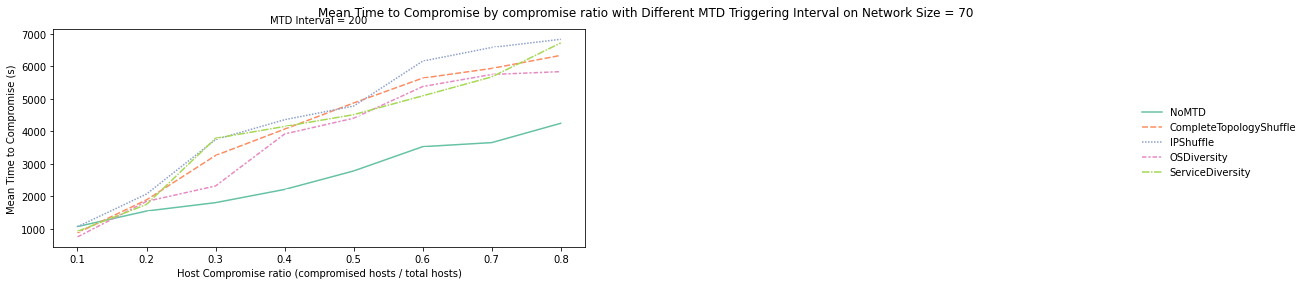

In [3]:
mttc_ratio_interval_results = results_avg[results_avg['Network Size']==25]
g = sns.FacetGrid(mttc_ratio_interval_results, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different MTD Triggering Interval on Network Size = 70')
savefig('experimental_data/plots/single_mttc_ratio_interval.jpg')
plt.show()


## Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 100

Saving figure to file experimental_data/plots/single_mttc_ratio_size.jpg


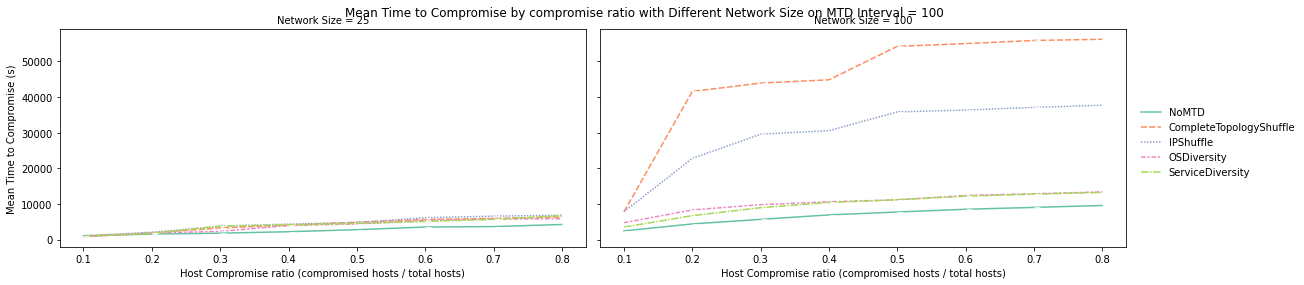

In [4]:
mttc_ratio_size_results = results_avg[results_avg['MTD Interval']==200]
g = sns.FacetGrid(mttc_ratio_size_results, col="Network Size",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.lineplot, x="Host Compromise ratio (compromised hosts / total hosts)", y="Mean Time to Compromise (s)", hue='Name', style='Name', marker=True, palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by compromise ratio with Different Network Size on MTD Interval = 100')
savefig('experimental_data/plots/single_mttc_ratio_size.jpg')
plt.show()

## Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8

Saving figure to file experimental_data/plots/single_mttc_size_interval.jpg


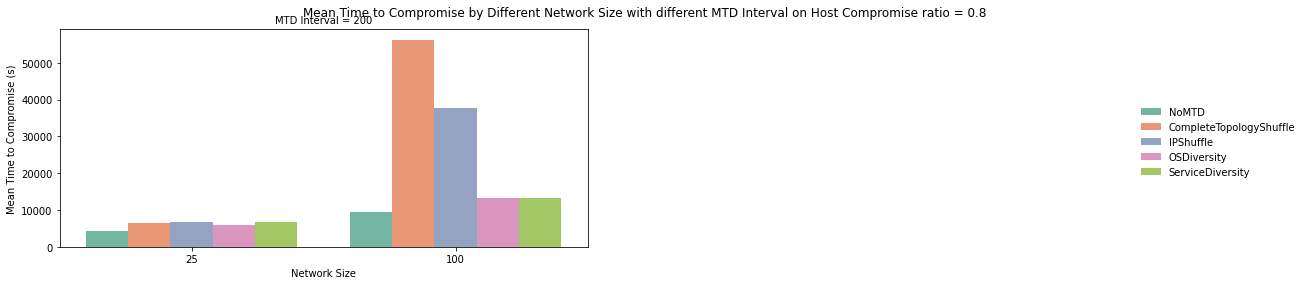

In [5]:
mttc_size_interval_results = results_avg[results_avg['Host Compromise ratio (compromised hosts / total hosts)']==0.8]

g = sns.FacetGrid(mttc_size_interval_results, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Mean Time to Compromise (s)", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Mean Time to Compromise by Different Network Size with different MTD Interval on Host Compromise ratio = 0.8')
savefig('experimental_data/plots/single_mttc_size_interval.jpg')
plt.show()

## Attack Success Rate by Network Size with Different MTD Interval

Saving figure to file experimental_data/plots/single_asr_interval_size.jpg


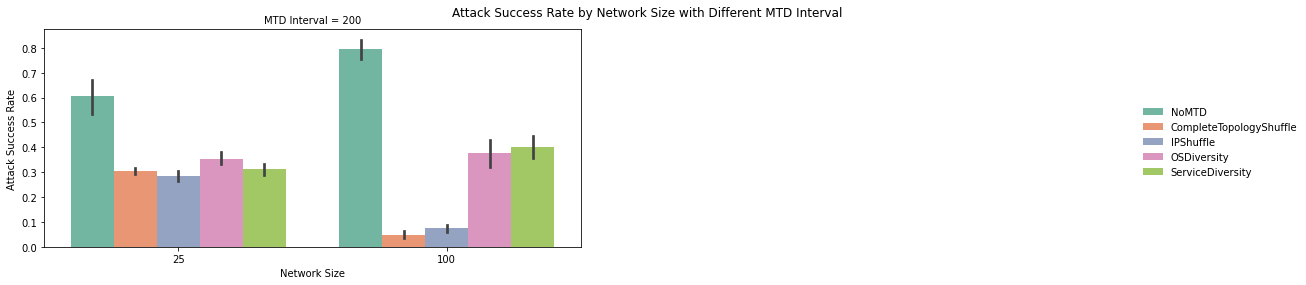

In [6]:
# plt.figure(figsize=(17, 10))
# sns.barplot(data=results_avg, x='MTD Interval', y='Attack Success Rate', hue='Name')
# plt.legend(loc='upper right')
# plt.title('Attack Success Rate at 10000s simulation time with different MTD triggering interval')
# savefig('experimental_data/plots/single_mtd_sim_asr.jpg')
# plt.show()


g = sns.FacetGrid(results_avg, col="MTD Interval",  col_wrap=2, margin_titles=True, despine=False, height=4, aspect= 2)
g.map_dataframe(sns.barplot, x="Network Size", y="Attack Success Rate", hue='Name', palette='Set2')
g.add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Attack Success Rate by Network Size with Different MTD Interval')
savefig('experimental_data/plots/single_asr_interval_size.jpg')
plt.show()

## The number of hosts being compromised at 10000s simulation time with 4 different MTD triggering interval

In [7]:
# plt.figure(figsize=(17, 10))
# sns.lineplot(data=results_avg, x='MTD Interval', y='Mean Time to Compromise', hue='Name', style='Name', markers=True, dashes=False)
# plt.show()
# plt.figure(figsize=(17, 10))
# sns.barplot(data=results_avg, x='MTD Interval', y='Compromised Num', hue='Name')
# plt.legend(loc='upper right')
# plt.title('The number of hosts being compromised at 10000s simulation time with different MTD triggering interval')
# savefig('experimental_data/plots/single_mtd_sim_cn.jpg')
# plt.show()